# Twitterverse Sentiment Analysis for Spiderman: Into The Spider-Verse(2018)  and Aquaman(2018) Movies
![text](twitter_movies.png "twitter.com")
Gathering 1600 tweets with the Spiderman hashtag, and 1600 tweets using #Aquaman, the following graph was produced with the results from a trained Naive Bayes Classifier, a model that classified the sentiments of text as positive or negative. Note that no neutral category was given, so every tweet had to fall in either one of the two categories. Help in getting a thorough categorization will be appreciated.

In [1]:
#Get the twitter_samples database with 5000 positive tweets and 5000 negative tweets
import nltk
# nltk.download("twitter_samples")
from nltk.corpus import twitter_samples
print (twitter_samples.fileids())#Should show three files

['negative_tweets.json', 'positive_tweets.json', 'tweets.20150430-223406.json']


In [2]:
#Clean and Tokenize tweets
import string
import re
 
from nltk.corpus import stopwords 
stopwords_english = stopwords.words('english')
 
from nltk.stem import PorterStemmer
stemmer = PorterStemmer() #Used to reduce words to their stem word ('likely' becomes 'like')

from nltk.tokenize import TweetTokenizer

#Use a variable for the positive, negative and all tweets using their respective file name:
pos_tweets = twitter_samples.strings('positive_tweets.json')
neg_tweets = twitter_samples.strings('negative_tweets.json')
all_tweets = twitter_samples.strings('tweets.20150430-223406.json')

#Choose elements to remove:
# Happy Emoticons, extracted from http://blog.chapagain.com.np
emoticons_happy = set([
    ':-)', ':)', ';)', ':o)', ':]', ':3', ':c)', ':>', '=]', '8)', '=)', ':}',
    ':^)', ':-D', ':D', '8-D', '8D', 'x-D', 'xD', 'X-D', 'XD', '=-D', '=D',
    '=-3', '=3', ':-))', ":'-)", ":')", ':*', ':^*', '>:P', ':-P', ':P', 'X-P',
    'x-p', 'xp', 'XP', ':-p', ':p', '=p', ':-b', ':b', '>:)', '>;)', '>:-)',
    '<3'
    ])
# Sad Emoticons, extracted from http://blog.chapagain.com.np
emoticons_sad = set([
    ':L', ':-/', '>:/', ':S', '>:[', ':@', ':-(', ':[', ':-||', '=L', ':<',
    ':-[', ':-<', '=\\', '=/', '>:(', ':(', '>.<', ":'-(", ":'(", ':\\', ':-c',
    ':c', ':{', '>:\\', ';('
    ])
# all emoticons (happy + sad)
emoticons = emoticons_happy.union(emoticons_sad)

def cleanAndTokenizeTweets(tweet):
    #Code extracted from http://blog.chapagain.com.np
    # remove stock market tickers like $GE
    tweet = re.sub(r'\$\w*', '', tweet)
 
    # remove old style retweet text "RT"
    tweet = re.sub(r'^RT[\s]+', '', tweet)
 
    # remove hyperlinks
    tweet = re.sub(r'https?:\/\/.*[\r\n]*', '', tweet)
    
    # remove hashtags
    # only removing the hash # sign from the word
    tweet = re.sub(r'#', '', tweet)
 
    # tokenize tweets
    tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True, reduce_len=True)
    tweet_tokens = tokenizer.tokenize(tweet)
 
    tweets_clean = []    
    for word in tweet_tokens:
        if (word not in stopwords_english and # remove stopwords
              word not in emoticons and # remove emoticons
                word not in string.punctuation): # remove punctuation
            #tweets_clean.append(word)
            stem_word = stemmer.stem(word) # stemming word
            tweets_clean.append(stem_word)
 
    return tweets_clean

#Create a bag of words function that cleans and tokenizes tweets, then returns the bag.
def bag_of_words(tweet):
    words = cleanAndTokenizeTweets(tweet)
    words_dictionary = dict([word, True] for word in words)    
    return words_dictionary

#Create a list of bags of words with all positive tweets
pos_tweets_set = []
for tweet in pos_tweets:
    pos_tweets_set.append((bag_of_words(tweet), 'pos')) 
    
#Create a list of bags of words with all negative tweets
neg_tweets_set = []
for tweet in neg_tweets:
    neg_tweets_set.append((bag_of_words(tweet), 'neg'))

# Radomize pos_reviews_set and neg_reviews_set
# doing so will output different accuracy result everytime we run the program
from random import shuffle 
shuffle(pos_tweets_set)
shuffle(neg_tweets_set)
 
test_set = pos_tweets_set[:1000] + neg_tweets_set[:1000]
train_set = pos_tweets_set[1000:] + neg_tweets_set[1000:]

#Print the resulting number of Test tweets and Train tweets
print('Test tweets:',len(test_set),'Train tweets:',len(train_set))

#Training Classifier and Calculating Accuracy
from nltk import classify
from nltk import NaiveBayesClassifier
 
classifier = NaiveBayesClassifier.train(train_set)
 
accuracy = classify.accuracy(classifier, test_set)

from collections import defaultdict
from nltk.metrics import precision, recall, f_measure, ConfusionMatrix

actual_set = defaultdict(set)
predicted_set = defaultdict(set)
 
actual_set_cm = []
predicted_set_cm = []
 
for index, (feature, actual_label) in enumerate(test_set):
    actual_set[actual_label].add(index)
    actual_set_cm.append(actual_label)
 
    predicted_label = classifier.classify(feature)
 
    predicted_set[predicted_label].add(index)
    predicted_set_cm.append(predicted_label)

Test tweets: 2000 Train tweets: 8000


In [3]:
#Now use the created model with the Spiderman and Aquaman tweets:
import pandas as pd
SpidermanDF = pd.read_csv('Spiderman Tweets')

#Create bag of words for each of the SpiderVerse tweets
Spider_text_set = []
for text in SpidermanDF['Text']:
    Spider_text_set.append(bag_of_words(text))

#Classify each bag of words
Spider_result = []
for bag in Spider_text_set:
    Spider_result.append(classifier.classify(bag))

SpidermanDF['Sentiment'] = Spider_result #Create a column in the df with the category given

plotSeries1 = SpidermanDF['Sentiment'].value_counts()

AquamanDF = pd.read_csv('Aquaman Tweets')

Aquaman_text_set = []
for text in AquamanDF['Text']:
    Aquaman_text_set.append(bag_of_words(text))

#Classify each bag of words
Aquaman_result = []
for bag in Aquaman_text_set:
    Aquaman_result.append(classifier.classify(bag))

AquamanDF['Sentiment'] = Aquaman_result #Create a column with the category given
plotSeries2 = AquamanDF['Sentiment'].value_counts()

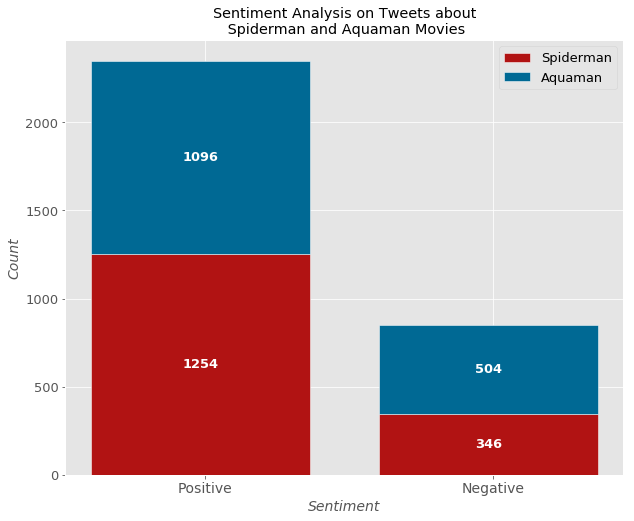

In [5]:
#PLOT
#The following code creates a stacked bar chart with two bars,
#one for the positive sentiment and the other for the negative.
import matplotlib.pyplot as plt
plt.style.use('ggplot')

fig = plt.figure(facecolor="white",figsize=(10,8))
bar_width = 0.38
ax = fig.add_subplot(1, 1, 1)
r = [0,0.5] # x-axis values to locate both bars [bar1,bar2]
tick_pos = [i + (bar_width/50) for i in r] # Position of the x-axis ticks

ax1 = ax.bar(r, plotSeries1.values, 
             width=bar_width, label='Spiderman', 
             color='#B11313',edgecolor='white' )
ax2 = ax.bar(r, plotSeries2.values, 
             bottom=plotSeries1.values, 
             width=bar_width, label='Aquaman', 
             color='#006994',edgecolor='white')

ax.set_ylabel("Count", fontsize=14, style='italic')
ax.set_xlabel("Sentiment", fontsize=14, style='italic')
ax.legend(loc='best')
plt.xticks(tick_pos, ["Positive", "Negative"], fontsize=14)
plt.yticks(fontsize=13)

for r1, r2 in zip(ax1, ax2): #Code to configure text inside each bar
    h1 = r1.get_height() #get height of bar to then divide by 2 and find center
    h2 = r2.get_height() 
    plt.text(r1.get_x() + r1.get_width() / 2., h1 / 2., "%d" % h1, ha="center", va="center", 
             color="white", fontsize=13, fontweight="bold")
    plt.text(r2.get_x() + r2.get_width() / 2., h1 + h2 / 2., "%d" % h2, ha="center", va="center", 
             color="white", fontsize=13, fontweight="bold")
plt.legend(prop={'size': 13})
plt.title('Sentiment Analysis on Tweets about\n Spiderman and Aquaman Movies')
plt.show()

## Box Office Results (as of Jan 8 2019):
How popular are these movies in terms of ticket sales? The total US box office grosses for each movie are given below:

__*<font color=#006994>Aquaman(2018) :  USD 266,460,074</font>*__

__*<font color=#B11313>Spiderman: Into The Spider-Verse(2018) :  USD 136,847,588</font>*__

## Classifier Precision Stats
pos = positive

neg = negative

In [6]:
print('pos precision:',round(
    precision(actual_set['pos'], predicted_set['pos']),4)*100,'%')
print('pos recall:',round(
    recall(actual_set['pos'], predicted_set['pos']),4)*100,'%') 
print('pos F-measure:',round(
    f_measure(actual_set['pos'], predicted_set['pos']),4)*100,'%')
print('neg precision:',round(
    precision(actual_set['neg'], predicted_set['neg']),4)*100,'%')
print('neg recall:',round(
    recall(actual_set['neg'], predicted_set['neg']),4)*100,'%') 
print('neg F-measure:',round(
    f_measure(actual_set['neg'], predicted_set['neg']),3)*100,'%')

pos precision: 75.17 %
pos recall: 77.5 %
pos F-measure: 76.32 %
neg precision: 76.78 %
neg recall: 74.4 %
neg F-measure: 75.6 %


## Classifier Acurracy on Labeling Sentiment
The following matrix shows that the classifier used in this case may have incorrectly labeled a percentage of tweets as negative/positive:

In [7]:
cm = ConfusionMatrix(actual_set_cm, predicted_set_cm)
print (cm.pretty_format(sort_by_count=True, show_percents=True, truncate=9))

    |      n      p |
    |      e      o |
    |      g      s |
----+---------------+
neg | <37.2%> 12.8% |
pos |  11.2% <38.8%>|
----+---------------+
(row = reference; col = test)



*Acknowledgements: Mukesh Chapagain in his blog found [here.](http://blog.chapagain.com.np/python-nltk-twitter-sentiment-analysis-natural-language-processing-nlp/)*